[View in Colaboratory](https://colab.research.google.com/github/DeltaCharlieAlpha/PatentAnalysisNotebooks/blob/master/Join_Excel_Lists.ipynb)

# Patent Join Example

This example shows how to take two different Excel files and join them together.  This is a patent-centric example aimed at Patent professionals who have limited coding experience.

### Prerequisites
A python version 3 or greater installation. If you don't know where to start, download Anaconda (a python distribution) here: https://www.anaconda.com/download/.  Once it is installed, you can start an anaconda notebook and follow along.  Alternatively, you can run a notebook in Google Collaboratory or Azure Notebooks with no need to install Anaconda.  If you are running in one of those two cloud services, you will need to read and write to a cloud file store like Google Drive or OneDrive.


### Scenarios
Joining data is useful when you have two different sets of data that need to be combined.  For example:
1. You have done a review previously and need to update it with a set of data recently issued
2. You have search results from two different sources and want to review one list without duplicates
3. You have divided up work into seperate files and now need to create a master list
4. You have data from one source, such as a docket management export (e.g. Anaqua) and you want to add data from another source (e.g. PatentAdvisor) 

For example data, I am going to do a search in one database and then join data from another.

The first data search will be from Google Patents.  For this search, I am doing a simple text search on "Blockchain" and looking for granted US patents
https://patents.google.com/?q=blockchain&q=block-chain&country=US&status=GRANT

From there, you can download with the "Download" link just below the search bar.  The resulting file will be in your downloads folder called something like "gp-search-20180428-144943.csv"

a .csv file is a generic spreadsheet-like file format that Excel and other programs can read.  Double-clicking on it should launch in Excel if you have Excel installed.

The next data search is from PatentAdvisor.  I am using the patent numbers from the CSV file downloaded from Google Patents to create a new report in PatentAdvisor.  From there, I download an Excel file with columns for examiner and art unit.



In [11]:
#start with the pandas library, that is a library for handling tabular data like Excel rows and columns
import pandas as pd

!pip install xlrd
!pip install openpyxl



Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
    100% |████████████████████████████████| 174kB 4.3MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ done
  Stored in directory: /content/.cache/pip/wheels/11/7d/47/3dad56b5d260c790d9110623ba66783a2ad345eb76dd63003b
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


In [12]:
file_location = "https://github.com/DeltaCharlieAlpha/PatentAnalysisNotebooks/raw/master/gp-search-20180428-150343.csv"

#or to load locally, construct a file location like r"c:\users\david\documents\gp-search-20180428-150343.csv".
# the r on before the quotes tells the computer to treat a \ character as just another character, even though it generally
# is a way if indicating a special character like a tab.

#now use the read_csv function to read the csv file.  Skiprows tells Python to skip the first row because Google sticks in an extra header row
search_data_frame = pd.read_csv(file_location, skiprows=1)
#now, verify that the data loaded correctly by displaying it in the notebook
display(search_data_frame)

,id,title,assignee,inventor/author,priority date,filing/creation date,publication date,grant date,result link,representative figure link
0,US-9569771-B2,Method and system for storage and retrieval of...,"Stephen Lesavich, Zachary C. LESAVICH","Stephen Lesavich, Zachary C. LESAVICH",2011-04-29,2016-06-06,2017-02-14,2017-02-14,https://patents.google.com/patent/US9569771B2/en,https://patentimages.storage.googleapis.com/6a...
1,US-9635000-B1,Blockchain identity management system based on...,Sead Muftic,Sead Muftic,2016-05-25,2016-05-25,2017-04-25,2017-04-25,https://patents.google.com/patent/US9635000B1/en,https://patentimages.storage.googleapis.com/77...
2,US-9608829-B2,System and method for creating a multi-branche...,Blockchain Technologies Corporation,"Nikolaos Spanos, Andrew R. Martin, Eric T. Dix...",2014-07-25,2015-07-24,2017-03-28,2017-03-28,https://patents.google.com/patent/US9608829B2/en,https://patentimages.storage.googleapis.com/d7...
3,US-9807106-B2,Mitigating blockchain attack,British Telecommunications Public Limited Company,"Joshua DANIEL, Gery Ducatel, Theo Dimitrakos",2015-07-31,2016-07-29,2017-10-31,2017-10-31,https://patents.google.com/patent/US9807106B2/en,https://patentimages.storage.googleapis.com/c8...
4,US-9774578-B1,Distributed key secret for rewritable blockchain,"Accenture Global Solutions Limited, GSC Secryp...","Giuseppe Ateniese, Michael T. Chiaramonte, Dav...",2016-05-23,2017-05-16,2017-09-26,2017-09-26,https://patents.google.com/patent/US9774578B1/en,https://patentimages.storage.googleapis.com/4b...
5,US-9853819-B2,"Blockchain-supported, node ID-augmented digita...",Guardtime Ip Holdings Ltd.,"Ahto Truu, Andres Kroonmaa, Michael GAULT, Jef...",2013-08-05,2016-10-17,2017-12-26,2017-12-26,https://patents.google.com/patent/US9853819B2/en,https://patentimages.storage.googleapis.com/d9...
6,US-9722790-B2,Identity management service using a blockchain...,"ShoCard, Inc.",Armin Ebrahimi,2015-05-05,2016-05-04,2017-08-01,2017-08-01,https://patents.google.com/patent/US9722790B2/en,https://patentimages.storage.googleapis.com/3c...
7,US-9882918-B1,User behavior profile in a blockchain,"Forcepoint, LLC","Richard Anthony Ford, Brandon L. Swafford, Chr...",2017-05-15,2017-09-29,2018-01-30,2018-01-30,https://patents.google.com/patent/US9882918B1/en,https://patentimages.storage.googleapis.com/06...
8,US-9934138-B1,Application testing on a blockchain,International Business Machines Corporation,"Vijay Kumar Ananthapur Bache, Jhilam Bera, Arv...",2016-12-07,2016-12-07,2018-04-03,2018-04-03,https://patents.google.com/patent/US9934138B1/en,https://patentimages.storage.googleapis.com/5f...
9,US-9870591-B2,Distributed electronic document review in a bl...,Netspective Communications Llc,Shahid N. Shah,2013-09-12,2016-12-21,2018-01-16,2018-01-16,https://patents.google.com/patent/US9870591B2/en,https://patentimages.storage.googleapis.com/e7...


In [13]:
patent_advisor_file_location = "https://github.com/DeltaCharlieAlpha/PatentAnalysisNotebooks/blob/master/PatentAdvisorBlockChain.xlsx?raw=true"

#this time use the read_excel function because the file is excel
patent_advisor_data_frame = pd.read_excel(patent_advisor_file_location)

display(patent_advisor_data_frame)

,Application (Default),Art Unit (Default),Ea. Publication No. (Default),Examiner (Default),Patent Number (Default),Class/Subclass
0,"09/608,469",2161,NaN,"FILIPCZYK, MARCIN R",6938039,707/200
1,"13/231,463",3717,2.013007e+10,"AHMED, MASUD",8523657,463/025
2,"13/231,509",3717,2.013007e+10,"AHMED, MASUD",8449378,463/025
3,"13/590,173",2433,2.013005e+10,"HOFFMAN, BRANDON S",8453219,726/004
4,"14/072,303",2498,2.015013e+10,"RAHMAN, MAHFUZUR",9338148,713/168
5,"14/177,211",2438,NaN,"PEARSON, DAVID J",9331856,713/179
6,"14/180,277",2665,2.015023e+10,"SHAH, UTPAL D",9311640,382/100
7,"14/192,842",3691,NaN,"CHANG, EDWARD",8756156,705/040
8,"14/209,578",3664,2.015026e+10,"AMIN, BHAVESH V",9364950,700/250
9,"14/209,826",3664,2.015026e+10,"RINK, RYAN J",9533413,700/250


In [14]:
#Next, we will look at the columns each file has to figure out what to join on.
#.columns on each dataframe shows the column names in each one.

print("search_data_Frame:",search_data_frame.columns)
print("patent_advisor_data_Frame:",patent_advisor_data_frame.columns)


('search_data_Frame:', Index([u'id', u'title', u'assignee', u'inventor/author', u'priority date',
       u'filing/creation date', u'publication date', u'grant date',
       u'result link', u'representative figure link'],
      dtype='object'))
('patent_advisor_data_Frame:', Index([u'Application (Default)', u'Art Unit (Default)',
       u'Ea. Publication No. (Default)', u'Examiner (Default)',
       u'Patent Number (Default)', u'Class/Subclass'],
      dtype='object'))


In [15]:
#Each dataframe has a column with patent numbers, so we should be able to match rows with matching patent numbers.
#BUT WAIT!  Of course the formats are different.  They are _always_ different.

#Google looks like US-9794074-B2 and Patent Advisor looks like 9794074.  So we need to first change the Google
#column to match the Patent Advisor column or vice versa.  We don't know the kind code, so we can't construct
#the last part of the Google format, so we can try to just change to the Patent Advisor version
#This could cause problems if we were working in multiple jurisdictions, because multiple patent numbers might match different
#jurisdictions without the US- prefix.

#first lets display the column we want to manipulate:
display(search_data_frame['id'])


0      US-9569771-B2
1      US-9635000-B1
2      US-9608829-B2
3      US-9807106-B2
4      US-9774578-B1
5      US-9853819-B2
6      US-9722790-B2
7      US-9882918-B1
8      US-9934138-B1
9      US-9870591-B2
10     US-9849364-B2
11     US-9836908-B2
12     US-9298806-B1
13     US-9397985-B1
14     US-9749297-B2
15     US-9898782-B1
16     US-9794074-B2
17     US-9513627-B1
18     US-9667600-B2
19     US-9703986-B1
20     US-9792101-B2
21     US-9509690-B2
22     US-9760827-B1
23     US-9881176-B2
24     US-9858781-B1
25     US-9667427-B2
26     US-9870562-B2
27     US-9876775-B2
28     US-9818092-B2
29     US-9862222-B1
           ...      
84     US-9702582-B2
85     US-9830593-B2
86     US-9735958-B2
87     US-9660627-B1
88     US-9922381-B2
89     US-9762562-B2
90     US-9933790-B2
91     US-9805360-B1
92     US-9436455-B2
93     US-9852305-B2
94     US-9633513-B2
95     US-9373223-B1
96     US-9646029-B1
97     US-9876646-B2
98     US-9836790-B2
99     US-9258307-B2
100    US-955

In [16]:
#now try a technique to make it look like just the patent number
#we will use 'slicing', a python method for getting just part of a data structure like a string or a list
#Of course string slicing will fail soon when patent numbers are not a uniform 7 digits, (See series.str.replace for alternative)
display(search_data_frame['id'].str[3:10])
#the .str after the column name asks Pandas to apply a string function and the [3:10] says to use characters 3-10 (zero based)
#the patent numbers look right, at least for 7 digit patent numbers (Soon this will fail when we reach 10,0000 patents)

0      9569771
1      9635000
2      9608829
3      9807106
4      9774578
5      9853819
6      9722790
7      9882918
8      9934138
9      9870591
10     9849364
11     9836908
12     9298806
13     9397985
14     9749297
15     9898782
16     9794074
17     9513627
18     9667600
19     9703986
20     9792101
21     9509690
22     9760827
23     9881176
24     9858781
25     9667427
26     9870562
27     9876775
28     9818092
29     9862222
        ...   
84     9702582
85     9830593
86     9735958
87     9660627
88     9922381
89     9762562
90     9933790
91     9805360
92     9436455
93     9852305
94     9633513
95     9373223
96     9646029
97     9876646
98     9836790
99     9258307
100    9552615
101    9645604
102    9935948
103    9872050
104    9595034
105    140937-
106    9704143
107    9364950
108    9533413
109    9824408
110    9425954
111    9398018
112    9830580
113    9553982
Name: id, Length: 114, dtype: object

In [17]:
#now create a new column with the patent number in the search data
search_data_frame['Patent Number'] = search_data_frame['id'].str[3:10]
display(search_data_frame['Patent Number'])

0      9569771
1      9635000
2      9608829
3      9807106
4      9774578
5      9853819
6      9722790
7      9882918
8      9934138
9      9870591
10     9849364
11     9836908
12     9298806
13     9397985
14     9749297
15     9898782
16     9794074
17     9513627
18     9667600
19     9703986
20     9792101
21     9509690
22     9760827
23     9881176
24     9858781
25     9667427
26     9870562
27     9876775
28     9818092
29     9862222
        ...   
84     9702582
85     9830593
86     9735958
87     9660627
88     9922381
89     9762562
90     9933790
91     9805360
92     9436455
93     9852305
94     9633513
95     9373223
96     9646029
97     9876646
98     9836790
99     9258307
100    9552615
101    9645604
102    9935948
103    9872050
104    9595034
105    140937-
106    9704143
107    9364950
108    9533413
109    9824408
110    9425954
111    9398018
112    9830580
113    9553982
Name: Patent Number, Length: 114, dtype: object

In [18]:
#now we have a column to match on, lets get the data together.

#use the merge function.  left_on and right_on are the columns from the two dataframes that we should match.
# 'how=outer' is the type of merge.  Inner, outer, left and right change what happens when there are rows that don't match(see below)

combined_data_frame = search_data_frame.merge( patent_advisor_data_frame, left_on='Patent Number', 
                                              right_on ='Patent Number (Default)', how = 'outer')
print("left length:", len(search_data_frame))
print("right length:", len(patent_advisor_data_frame))
print("combined length:", len(combined_data_frame))

('left length:', 114)
('right length:', 99)
('combined length:', 213)


### Different types of joins are described here:
http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/

<img src=http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png>


In [19]:
#We did the join, but it doesn't look right.  The combined length is the left len plus the right length, when we expected
# the length to be the max of left and right.  What happened?
# There is a data type problem.  Pandas thought that Patent Number in the Search data frame 
# was a string, but it thought that Patent Number (Default) in the Patent Advisor data was a number,
# so it can't match them.  We need to change the datatype to string for both.

#create a new column called "Patent Number" (as opposed to "Patent Nubmer (Default)") that is a string
patent_advisor_data_frame['Patent Number'] = patent_advisor_data_frame['Patent Number (Default)'].astype(str)

#now we can use a different syntax because both data frames have a column called "Patent Number".  "on" means
# look for a column called "Patent Number" in both data frames.
combined_data_frame = search_data_frame.merge( patent_advisor_data_frame, on ='Patent Number', how = 'outer')
display(combined_data_frame)

,id,title,assignee,inventor/author,priority date,filing/creation date,publication date,grant date,result link,representative figure link,Patent Number,Application (Default),Art Unit (Default),Ea. Publication No. (Default),Examiner (Default),Patent Number (Default),Class/Subclass
0,US-9569771-B2,Method and system for storage and retrieval of...,"Stephen Lesavich, Zachary C. LESAVICH","Stephen Lesavich, Zachary C. LESAVICH",2011-04-29,2016-06-06,2017-02-14,2017-02-14,https://patents.google.com/patent/US9569771B2/en,https://patentimages.storage.googleapis.com/6a...,9569771,"15/174,872",2153.0,2.016032e+10,"HTAY, LIN LIN M",9569771.0,707/706
1,US-9635000-B1,Blockchain identity management system based on...,Sead Muftic,Sead Muftic,2016-05-25,2016-05-25,2017-04-25,2017-04-25,https://patents.google.com/patent/US9635000B1/en,https://patentimages.storage.googleapis.com/77...,9635000,"15/163,922",2493.0,NaN,"LE, CHAU D",9635000.0,713/176
2,US-9608829-B2,System and method for creating a multi-branche...,Blockchain Technologies Corporation,"Nikolaos Spanos, Andrew R. Martin, Eric T. Dix...",2014-07-25,2015-07-24,2017-03-28,2017-03-28,https://patents.google.com/patent/US9608829B2/en,https://patentimages.storage.googleapis.com/d7...,9608829,"14/809,062",2498.0,2.016003e+10,"RAHMAN, MAHFUZUR",9608829.0,713/193
3,US-9807106-B2,Mitigating blockchain attack,British Telecommunications Public Limited Company,"Joshua DANIEL, Gery Ducatel, Theo Dimitrakos",2015-07-31,2016-07-29,2017-10-31,2017-10-31,https://patents.google.com/patent/US9807106B2/en,https://patentimages.storage.googleapis.com/c8...,9807106,"15/223,261",2431.0,2.017003e+10,"CHAI, LONGBIT",9807106.0,726/022
4,US-9774578-B1,Distributed key secret for rewritable blockchain,"Accenture Global Solutions Limited, GSC Secryp...","Giuseppe Ateniese, Michael T. Chiaramonte, Dav...",2016-05-23,2017-05-16,2017-09-26,2017-09-26,https://patents.google.com/patent/US9774578B1/en,https://patentimages.storage.googleapis.com/4b...,9774578,"15/596,899",2497.0,NaN,"SHAYANFAR, ALI",9774578.0,713/171
5,US-9853819-B2,"Blockchain-supported, node ID-augmented digita...",Guardtime Ip Holdings Ltd.,"Ahto Truu, Andres Kroonmaa, Michael GAULT, Jef...",2013-08-05,2016-10-17,2017-12-26,2017-12-26,https://patents.google.com/patent/US9853819B2/en,https://patentimages.storage.googleapis.com/d9...,9853819,"15/295,928",2437.0,2.017003e+10,"DINH, MINH",9853819.0,713/156
6,US-9722790-B2,Identity management service using a blockchain...,"ShoCard, Inc.",Armin Ebrahimi,2015-05-05,2016-05-04,2017-08-01,2017-08-01,https://patents.google.com/patent/US9722790B2/en,https://patentimages.storage.googleapis.com/3c...,9722790,"15/146,881",2439.0,2.016033e+10,"BROWN, CHRISTOPHER J",9722790.0,713/176
7,US-9882918-B1,User behavior profile in a blockchain,"Forcepoint, LLC","Richard Anthony Ford, Brandon L. Swafford, Chr...",2017-05-15,2017-09-29,2018-01-30,2018-01-30,https://patents.google.com/patent/US9882918B1/en,https://patentimages.storage.googleapis.com/06...,9882918,"15/720,788",2435.0,NaN,"SCHWARTZ, DARREN B",9882918.0,726/023
8,US-9934138-B1,Application testing on a blockchain,International Business Machines Corporation,"Vijay Kumar Ananthapur Bache, Jhilam Bera, Arv...",2016-12-07,2016-12-07,2018-04-03,2018-04-03,https://patents.google.com/patent/US9934138B1/en,https://patentimages.storage.googleapis.com/5f...,9934138,"15/371,812",2197.0,NaN,"BODDEN, EVRAL E",9934138.0,717/124
9,US-9870591-B2,Distributed electronic document review in a bl...,Netspective Communications Llc,Shahid N. Shah,2013-09-12,2016-12-21,2018-01-16,2018-01-16,https://patents.google.com/patent/US9870591B2/en,https://patentimages.storage.googleapis.com/e7...,9870591,"15/386,846",3689.0,2.017010e+10,"ARAQUE JR, GERARDO",9870591.0,705/317


In [0]:
#this looks right.  Now we can export to Excel:
combined_data_frame.to_excel(r"./combined_data.xlsx")
#if you are in Azure Notebooks, where this is orignally hosted, you can download this file using the Data menu.

In [21]:
#now that the join is done, we can examine some of the values to see if there is any interesting data.
# lets look at the top 10 examiners who have issued patents that matched our search 
display(combined_data_frame['Examiner (Default)'].value_counts().head(10))

SCHWARTZ, DARREN B        4
CHAUDHRY, MUHAMMAD U      3
FENSTERMACHER, JASON B    3
AHMED, MASUD              3
KING JR., JOSEPH W        3
ZEE, EDWARD               2
ZHAO, DON GORDON          2
OKEKE, IZUNNA             2
MASINICK, MICHAEL D       2
SHEHNI, GHAZAL B          2
Name: Examiner (Default), dtype: int64

In [22]:
# lets look at the top 10 art units who have issued patents that matched our search 
display(combined_data_frame['Art Unit (Default)'].value_counts().head(10))

3685.0    7
2493.0    7
2435.0    6
2497.0    5
3717.0    5
3696.0    4
2436.0    4
2161.0    4
2438.0    3
2498.0    3
Name: Art Unit (Default), dtype: int64

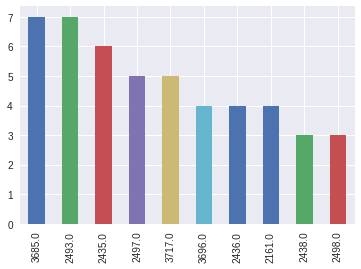

In [23]:
#now get fancy and show the art units as a bar chart.  
%matplotlib inline
import matplotlib.pyplot as plt
plt = combined_data_frame['Art Unit (Default)'].value_counts().head(10).plot.bar()

## Showing off
Ok, lets have a little more fun.  Lets install the WordCloud package and build a word cloud from the titles of the patents.

In [24]:
#The wordcloud package isn't part of the default install, so we have to tell Azure to install it for us:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
    100% |████████████████████████████████| 174kB 3.7MB/s 
  Running setup.py bdist_wheel for wordcloud ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/3e/40/7c/d768cb5022ec6aa5611728339886bc1e9f0b629547f39237fd
Successfully built wordcloud


In [0]:
#Now that it is installed, load the module:
from wordcloud import WordCloud

#now process the text into one long string, dropping blank rows (dropna)
text = ' '.join(combined_data_frame['title'].dropna())

#convert everything to title case so System, system, and SYSTEM all are now System.
text = text.title()

#remove non-interesting words:
stop_words = ["System", "Method","Using"]
for word in stop_words:
    text=text.replace(word, "")
                
wordcloud = WordCloud(width= 1200, height=800, background_color='white').generate(text)

(-0.5, 1199.5, 799.5, -0.5)

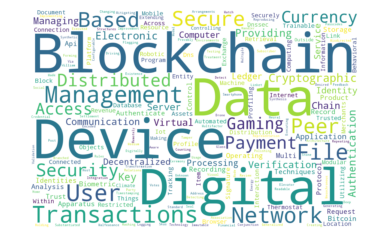

In [33]:
#now display the image as a graph using matplotlib
import matplotlib.pyplot as plt
ax = plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")